In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Suppress specific FutureWarnings from seaborn
warnings.filterwarnings("ignore", category=FutureWarning)

# About the dataset

Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

* **Restaurant Id:** Unique id of every restaurant across various cities of the world.
* **Restaurant Name:** Name of the restaurant.
* **Country Code:** Country in which restaurant is located.
* **City:** City in which restaurant is located.
* **Address:** Address of the restaurant.
* **Locality:** Location in the city.
* **Locality Verbose:** Detailed description of the locality.
* **Longitude:** Longitude coordinate of the restaurant's location.
* **Latitude:** Latitude coordinate of the restaurant's location.
* **Cuisines:** Cuisines offered by the restaurant.
* **Average Cost for two:** Cost for two people in different currencies. 👫
* **Currency:** Currency of the country.
* **Has Table booking:** yes/no.
* **Has Online delivery:** yes/ no.
* **Is delivering:** yes/ no.
* **Switch to order menu:** yes/no.
* **Price range:** Range of price of food.
* **Aggregate Rating:** Average rating out of 5
* **Rating color:** depending upon the average rating color
* **Rating text:** text on the basis of rating of rating
* **Votes:** Number of ratings casted by peopletings casted by people

## Uploading the data

In [5]:
df=pd.read_csv('indiazomato.csv', encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [6]:
## making a copy of dataset
df_original=df.copy()

In [7]:
df.shape

(8652, 21)

## Checking data information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   Restaurant Name       8652 non-null   object 
 2   Country Code          8652 non-null   int64  
 3   City                  8652 non-null   object 
 4   Address               8652 non-null   object 
 5   Locality              8652 non-null   object 
 6   Locality Verbose      8652 non-null   object 
 7   Longitude             8652 non-null   float64
 8   Latitude              8652 non-null   float64
 9   Cuisines              8652 non-null   object 
 10  Average Cost for two  8652 non-null   int64  
 11  Currency              8652 non-null   object 
 12  Has Table booking     8652 non-null   object 
 13  Has Online delivery   8652 non-null   object 
 14  Is delivering now     8652 non-null   object 
 15  Switch to order menu 

## Checking missing values

In [9]:
z=df.isnull().sum()[df.isnull().sum()>0].to_frame().rename(columns={0:'Missing Values'})
z['% of missing values'] = z['Missing Values']/df.shape[0]*10
z

,Missing Values,% of missing values


* There are only 9 missing values in Cuisines feature
* We will fill the null value with default value like: Unknown

In [10]:
df[df['Cuisines'].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes


### Filling missing values with default value: Unknown

In [11]:
df['Cuisines']=df['Cuisines'].fillna('Unknown')
print(df['Cuisines'].isnull().sum())

0


## Checking duplicate values

In [12]:
df.duplicated().sum()

0

## Droping the Features

In [13]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [14]:
drop_cols=['Restaurant ID', 'Country Code', 'Switch to order menu', 'Address', 'Locality Verbose', 'Longitude', 'Latitude']
df = df.drop(columns=drop_cols)

In [16]:
df.columns

Index(['Restaurant Name', 'City', 'Locality', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [15]:
df.head()

,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Jahanpanah,Agra,Agra Cantt,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Yellow,Good,140
1,Rangrezz Restaurant,Agra,Agra Cantt,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Yellow,Good,71
2,Time2Eat - Mama Chicken,Agra,Agra Cantt,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Yellow,Good,94
3,Chokho Jeeman Marwari Jain Bhojanalya,Agra,Civil Lines,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Green,Very Good,87
4,Pinch Of Spice,Agra,Civil Lines,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Green,Very Good,177


In [17]:
df.shape

(8652, 14)

In [20]:
final_df = df.copy()

In [21]:
rest_in_city=final_df.City.value_counts()
rest_in_city

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
Ahmedabad,21
Guwahati,21
Lucknow,21
Bhubaneshwar,21


In [22]:
city_names=final_df.City.value_counts().index
city_names

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad', 'Ahmedabad',
       'Guwahati', 'Lucknow', 'Bhubaneshwar', 'Amritsar', 'Pune', 'Puducherry',
       'Patna', 'Ludhiana', 'Ranchi', 'Surat', 'Vadodara', 'Nashik', 'Nagpur',
       'Mysore', 'Mumbai', 'Varanasi', 'Mangalore', 'Agra', 'Kochi', 'Kolkata',
       'Dehradun', 'Allahabad', 'Aurangabad', 'Bangalore', 'Bhopal', 'Chennai',
       'Coimbatore', 'Goa', 'Indore', 'Jaipur', 'Kanpur', 'Vizag',
       'Chandigarh', 'Hyderabad', 'Secunderabad', 'Panchkula', 'Mohali'],
      dtype='object', name='City')

In [23]:
city_val=final_df.City.value_counts().values
city_val

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   18,   18,    2,    1,    1])

## Pie chart for top five cities that uses zomato

([<matplotlib.patches.Wedge at 0x7c4afdf03350>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.869%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.068%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.590%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.158%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.315%')])

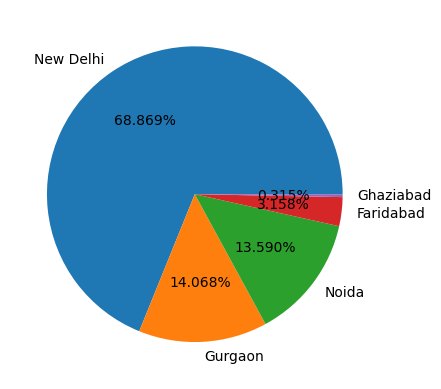

In [24]:
plt.pie(city_val[:5],labels=city_names[:5],autopct='%1.3f%%')

* As we have seen in noida and faridabad we can use discount policies to improve sales

### Checking which city has how many restaurants in India

In [26]:
rest_in_city=final_df.City.value_counts()
rest_in_city

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
Ahmedabad,21
Guwahati,21
Lucknow,21
Bhubaneshwar,21


**Observation**

* We can see that Gurgaon has 1118 most restaurants and New Delhi has 5473 and Noida has 1080. These are the cities with most restaurants

### Which city do have maximum online deliveries option edit--

In [28]:
final_df[final_df['Has Online delivery'] =="Yes"].City.value_counts()

,count
City,
New Delhi,1489
Gurgaon,425
Noida,364
Faridabad,35
Chennai,13
Ahmedabad,11
Nagpur,10
Jaipur,10
Ghaziabad,10


**Observations:**

Online Deliveries are only available in India and UAE

### Let's check the Cities which has table bookings

In [29]:
final_df[final_df['Has Table booking']=='Yes'].City.value_counts()

,count
City,
New Delhi,715
Gurgaon,204
Noida,112
Faridabad,15
Chennai,13
Pune,13
Hyderabad,10
Kolkata,9
Mumbai,9


**Observation**

* Most are from New Delhi, Gurgaon and Noida

## Analysing Rating Features

In [30]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Counts'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Counts
0,0.0,White,Not rated,2139
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,26
6,2.3,Red,Poor,46
7,2.4,Red,Poor,83
8,2.5,Orange,Average,109
9,2.6,Orange,Average,190


**Observation**

1. When Rating is between 4.5 to 4.9---> Excellent
2. When Rating are between 4.0 to 4.4--->very good
3. when Rating is between 3.5 to 3.9----> good
4. when Rating is between 3.0 to 3.4----> average
5. when Rating is between 2.5 to 2.9----> average
6. when Rating is between 2.0 to 2.4----> Poor





<Axes: xlabel='Aggregate rating', ylabel='Rating Counts'>

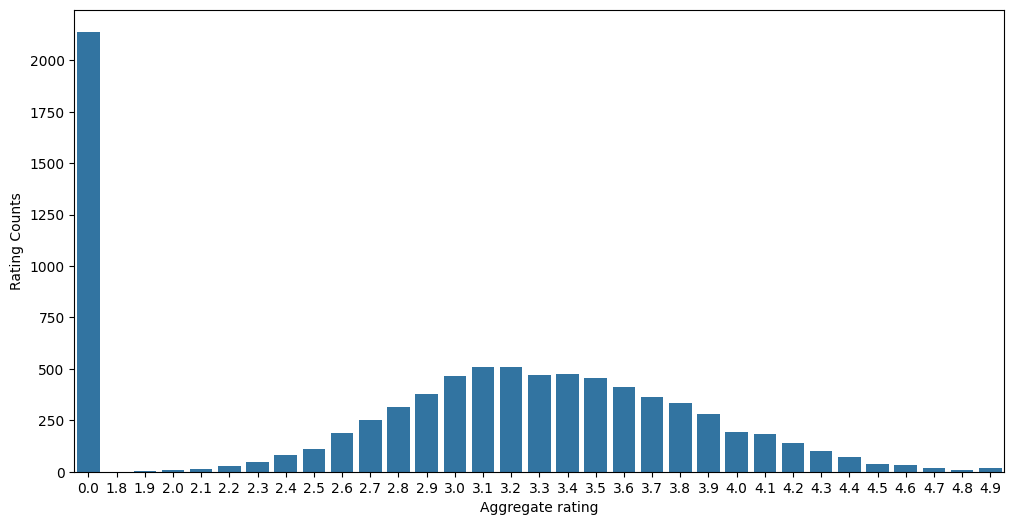

In [31]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Aggregate rating",y="Rating Counts",data=ratings)

# Distribution of 'Aggregate rating'

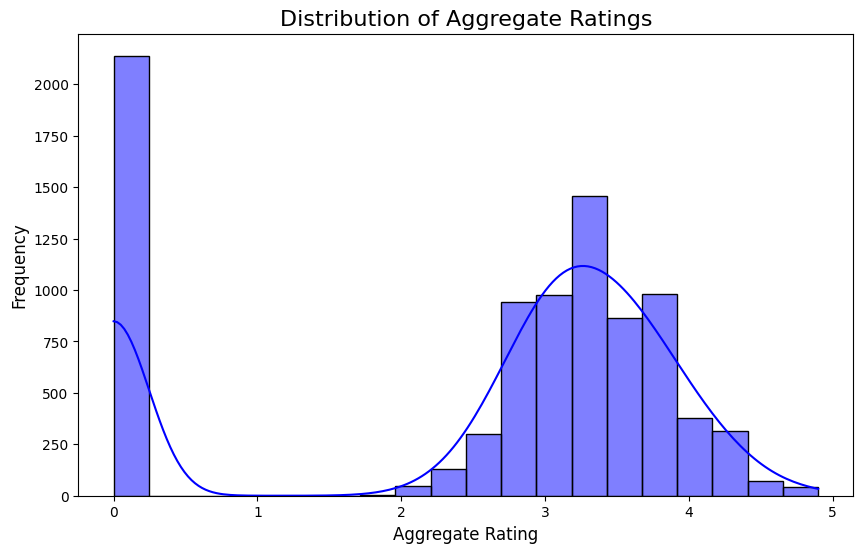

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(final_df['Aggregate rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Aggregate Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [33]:
final_df['Aggregate rating'].describe()

,Aggregate rating
count,8652.000000
mean,2.523324
std,1.510986
min,0.000000
25%,2.100000
50%,3.100000
75%,3.600000
max,4.900000


**Observation**

* Aggregate rating ranges from 0 to 4.9, with a mean of 2.67.

## Distribution of 'Aggregate Rating' across countries

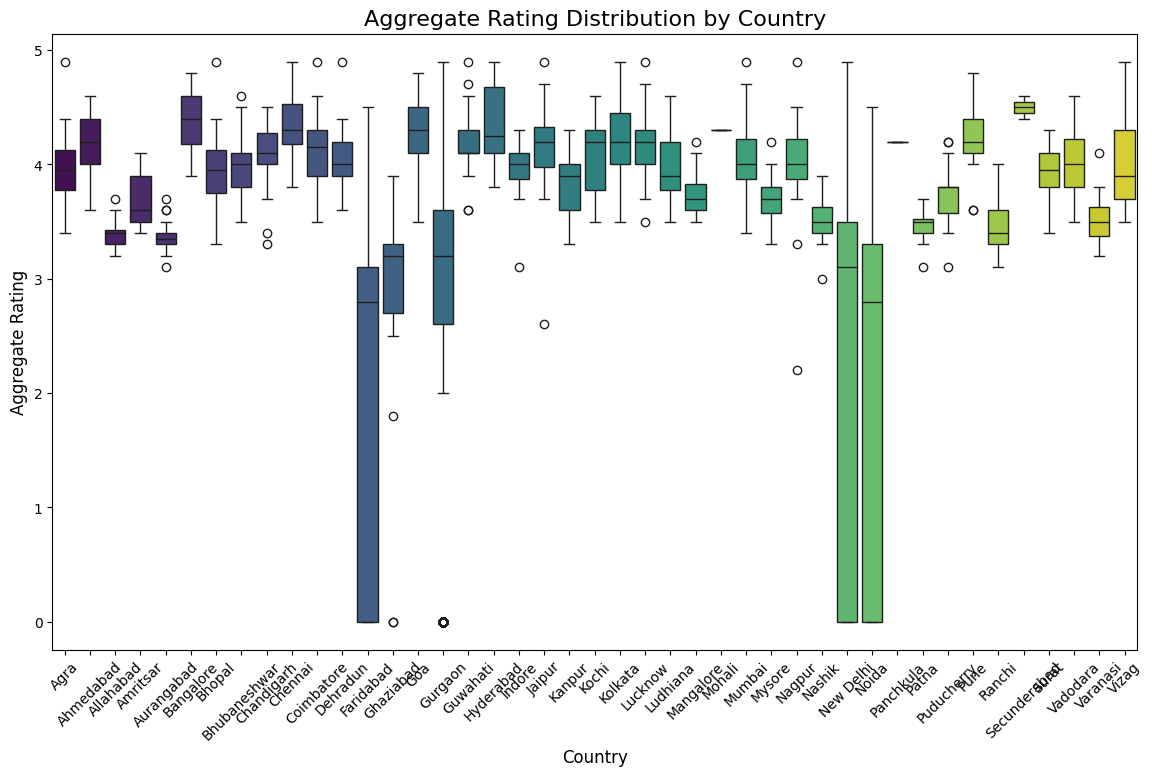

In [35]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=final_df, x='City', y='Aggregate rating', palette='viridis')
plt.xticks(rotation=45)
plt.title('Aggregate Rating Distribution by Country', fontsize=16)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

**Observation**

* Ratings vary widely across countries, with some countries having higher median ratings.
* ndia has the most restaurants but also exhibits a broader spread of ratings.


## Top 10 cities with the most restaurants

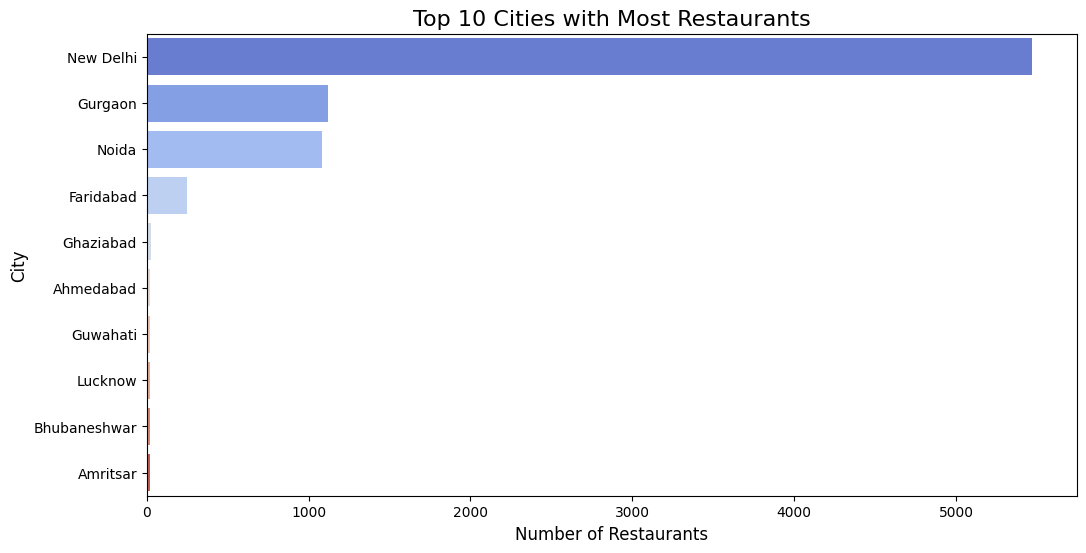

In [36]:
top_cities = final_df['City'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='coolwarm')
plt.title('Top 10 Cities with Most Restaurants', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

**Observation**

* New delhi has most of the restaurants

# Distribution of 'Votes'

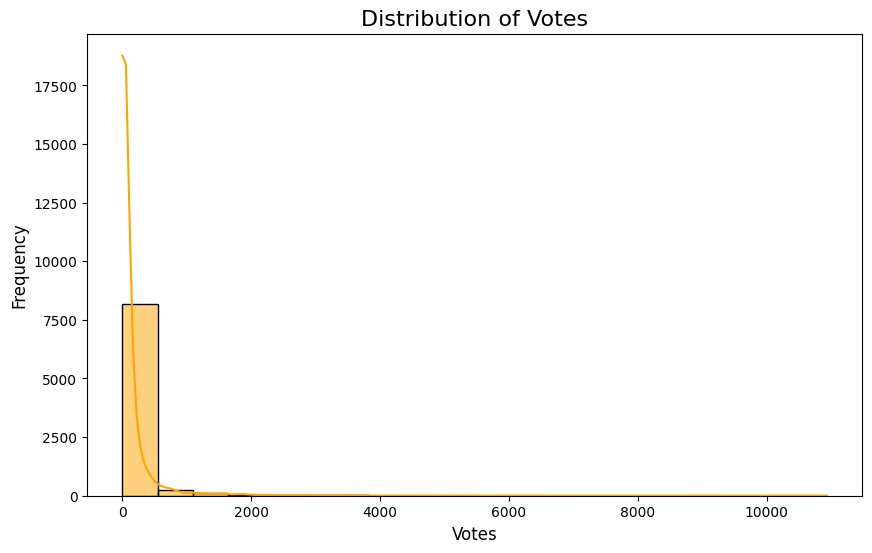

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(final_df['Votes'],bins=20,kde=True, color='orange')
plt.title('Distribution of Votes', fontsize=16)
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [38]:
final_df['Votes'].describe()

,Votes
count,8652.000000
mean,137.212552
std,428.039513
min,0.000000
25%,4.000000
50%,24.000000
75%,100.000000
max,10934.000000


**Observation**

* Votes have a highly skewed distribution, ranging from 0 to 10,934.

# Distribution of 'Average Cost for two'

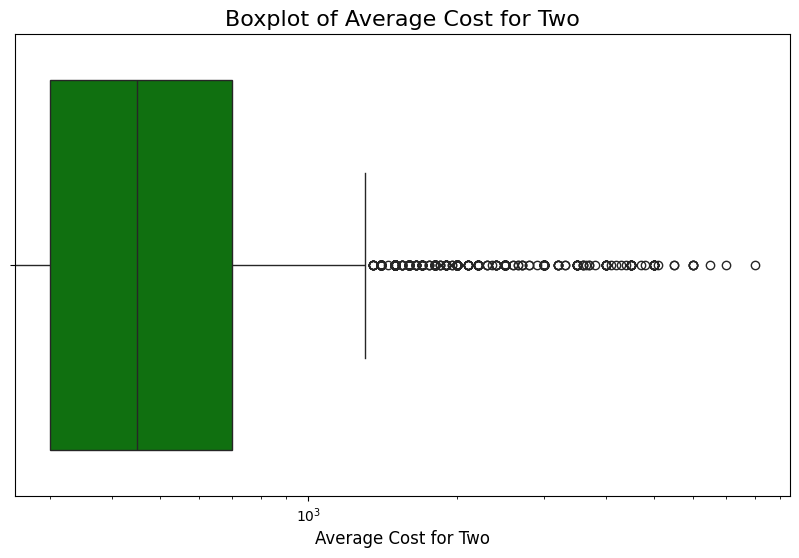

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=final_df['Average Cost for two'], color='green')
plt.title('Boxplot of Average Cost for Two', fontsize=16)
plt.xlabel('Average Cost for Two', fontsize=12)
plt.xscale('log')  # Log scale due to extreme values
plt.show()

In [40]:
final_df['Average Cost for two'].describe()

,Average Cost for two
count,8652.000000
mean,623.370319
std,595.676124
min,0.000000
25%,300.000000
50%,450.000000
75%,700.000000
max,8000.000000


**Observation**

* Average Cost for Two has outliers, with values up to 800,000..

## Average cost for two vs. Aggregate Rating

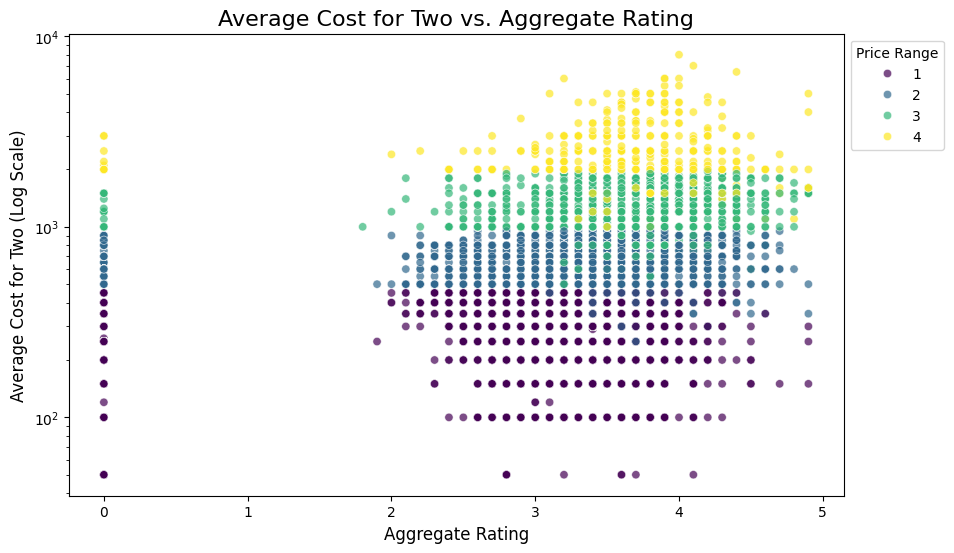

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='Aggregate rating', y='Average Cost for two', hue='Price range', palette='viridis', alpha=0.7)
plt.yscale('log')  # Log scale is used for better to better visualize cost distribution due to extreme values
plt.title('Average Cost for Two vs. Aggregate Rating', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Average Cost for Two (Log Scale)', fontsize=12)
plt.legend(title='Price Range', bbox_to_anchor=(1, 1))
plt.show()

**Observation**

* Higher-rated restaurants tend to have a wide range of costs.

## Cuisines word cloud for most popular cuisines


In [42]:
!pip install wordcloud
from wordcloud import WordCloud

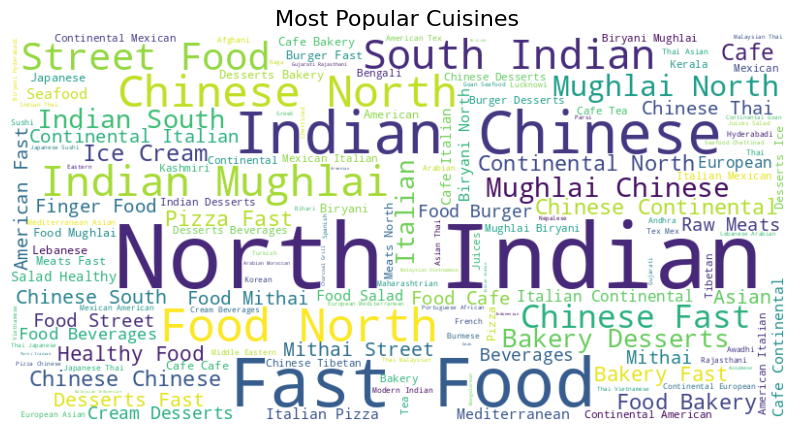

In [43]:
cuisine_text = ' '.join(final_df['Cuisines'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cuisine_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Cuisines', fontsize=16)
plt.show()

**Observation**

* The word cloud highlights the diversity in cuisines, with "North Indian" being the most frequently mentioned.

# Extract cuisines data for analysis

In [52]:
cuisine_data = final_df[['Cuisines', 'City', 'Aggregate rating', 'Price range']]
cuisine_data.head()

,Cuisines,City,Aggregate rating,Price range
0,"North Indian, Mughlai",Agra,3.9,3
1,"North Indian, Mughlai",Agra,3.5,2
2,North Indian,Agra,3.6,2
3,Rajasthani,Agra,4.0,2
4,"North Indian, Chinese, Mughlai",Agra,4.2,3


## Clean and expand cuisines column for analysis

In [53]:
cuisine_data_expanded = (
    cuisine_data.assign(Cuisines=cuisine_data['Cuisines'].str.split(', '))
    .explode('Cuisines')
    .reset_index(drop=True)
)

In [54]:
cuisine_data_expanded

,Cuisines,City,Aggregate rating,Price range
0,North Indian,Agra,3.9,3
1,Mughlai,Agra,3.9,3
2,North Indian,Agra,3.5,2
3,Mughlai,Agra,3.5,2
4,North Indian,Agra,3.6,2
...,...,...,...,...
17849,American,Vizag,3.8,4
17850,North Indian,Vizag,3.8,4
17851,Thai,Vizag,3.8,4
17852,Continental,Vizag,3.8,4


## Top 10 Cuisines by Popularity

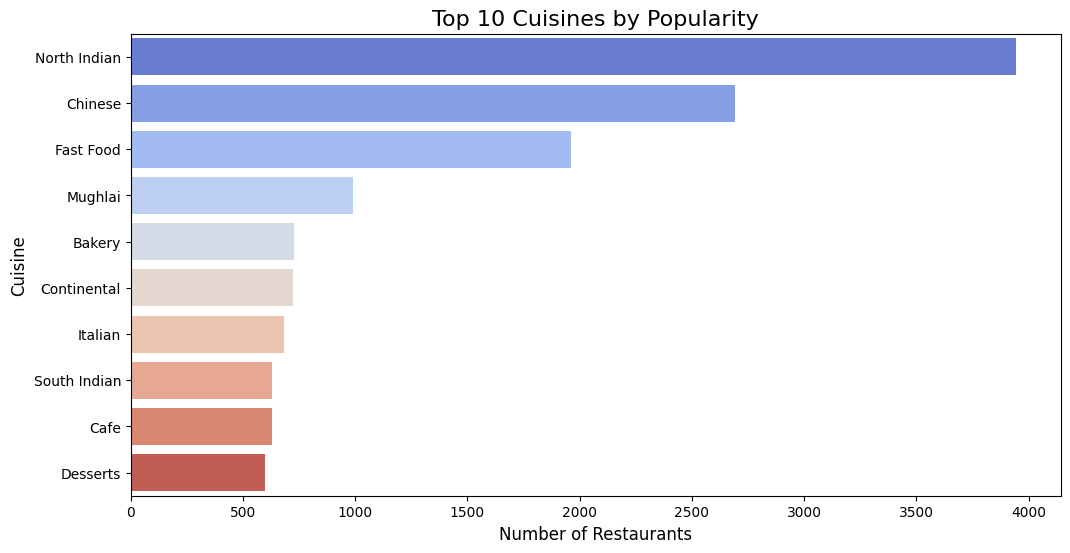

In [55]:
top_cuisines = cuisine_data_expanded['Cuisines'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='coolwarm')
plt.title('Top 10 Cuisines by Popularity', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)
plt.show()

**Observation**

* North Indian: Most popular, with approx 4000 occurrences.
* Followed by Chinese, Fast Food, and Mughlai.

## Cuisine Diversity by Country


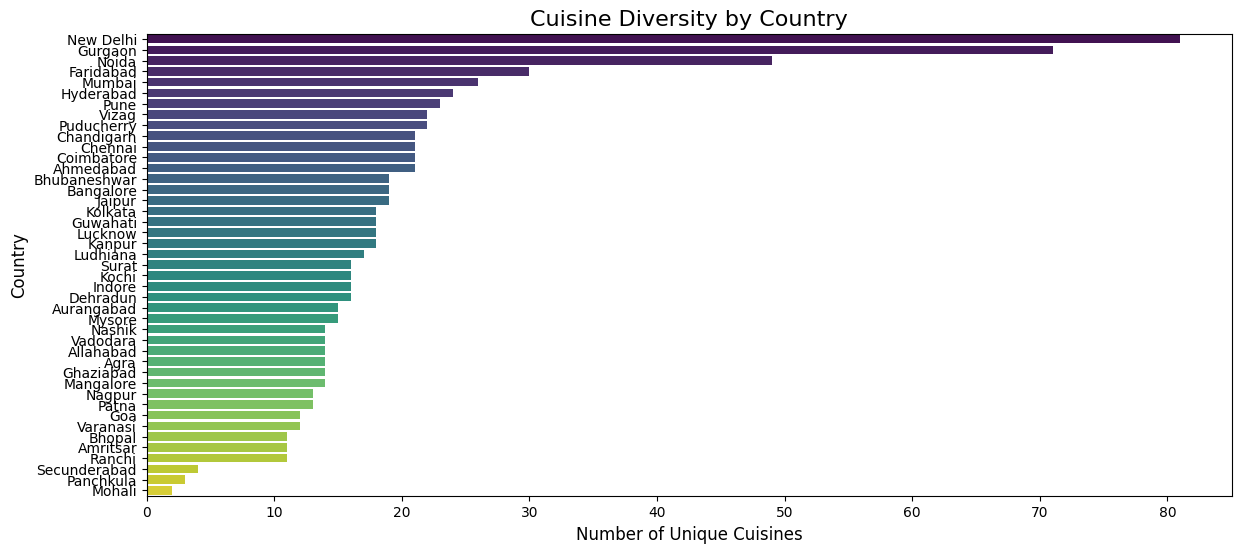

In [56]:
cuisine_country = cuisine_data_expanded.groupby('City')['Cuisines'].nunique().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x=cuisine_country.values, y=cuisine_country.index, palette='viridis')
plt.title('Cuisine Diversity by Country', fontsize=16)
plt.xlabel('Number of Unique Cuisines', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

**Observation**

* India has the highest cuisine diversity with approx 90 unique cuisines.
* Other countries with significant diversity include the United States approx (60) and the United Kingdom (40).

## Cuisines with Highest Average Aggregate Ratings

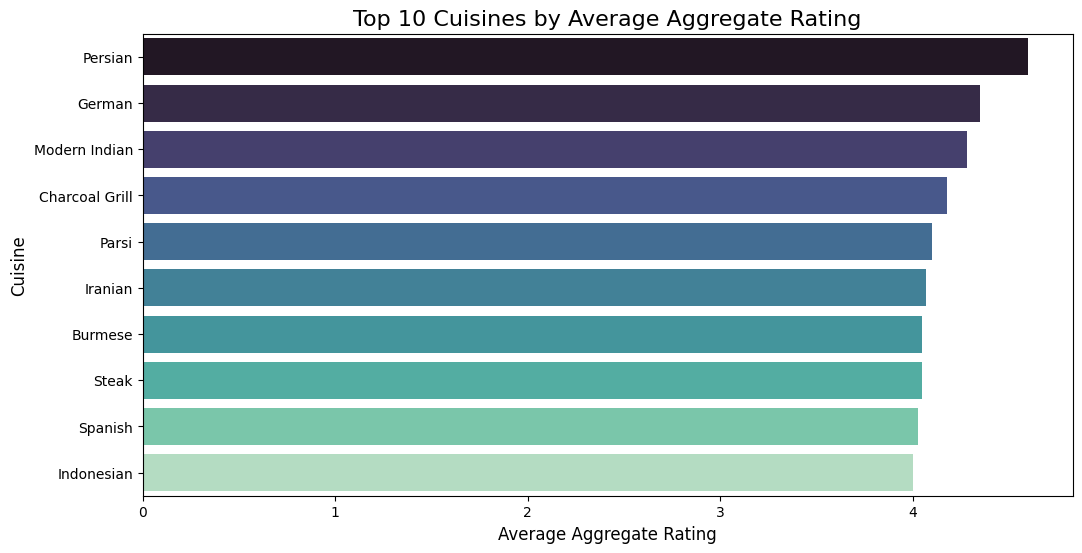

In [57]:
cuisine_rating = cuisine_data_expanded.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_rating.values, y=cuisine_rating.index, palette='mako')
plt.title('Top 10 Cuisines by Average Aggregate Rating', fontsize=16)
plt.xlabel('Average Aggregate Rating', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)
plt.show()

## Cuisines with Highest Average Price Range

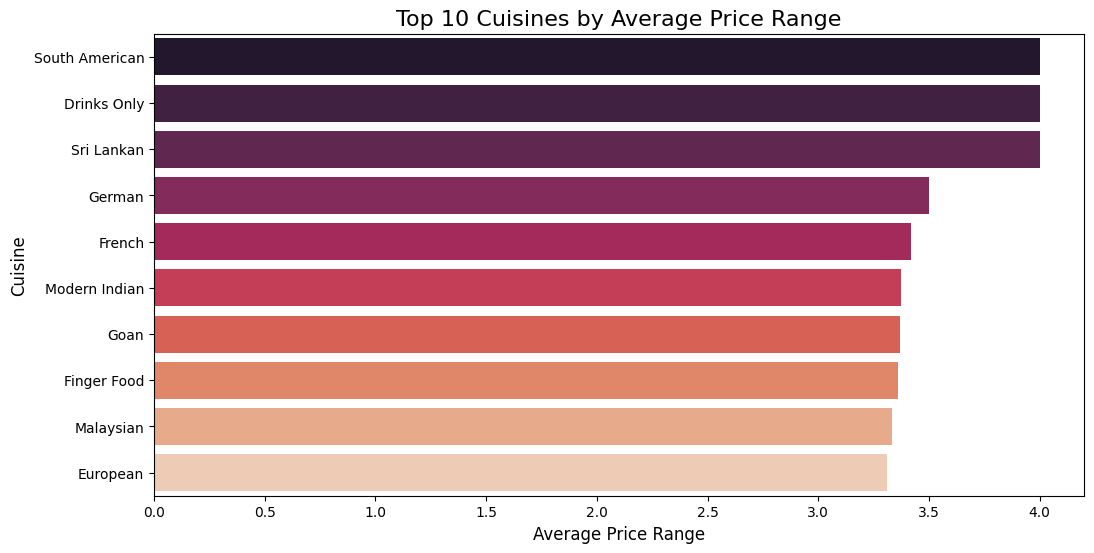

In [58]:
cuisine_price = cuisine_data_expanded.groupby('Cuisines')['Price range'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_price.values, y=cuisine_price.index, palette='rocket')
plt.title('Top 10 Cuisines by Average Price Range', fontsize=16)
plt.xlabel('Average Price Range', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)
plt.show()

## Count plot


<Axes: xlabel='Rating color', ylabel='count'>

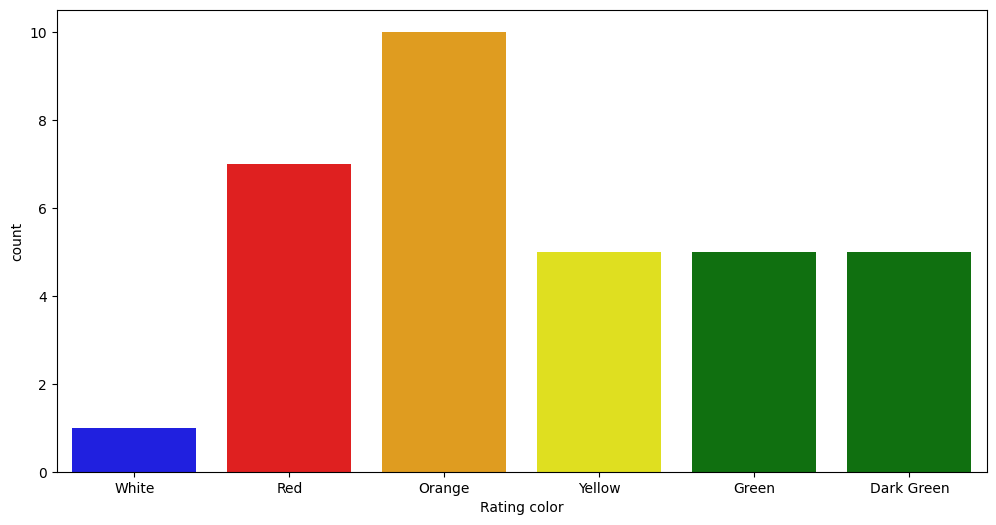

In [59]:
sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])

# Recommendations for Increasing Sales Based on Analysis

1. **Focus on Popular Cuisines:**
   * Invest in restaurants offering top cuisines like North Indian, Chinese, and Fast Food, as they dominate customer preferences.
   * Expand the presence of niche but high-rating cuisines to attract premium customers.
     

2. **Optimize Pricing Strategy:**
   * Offer value-for-money options in Fast Food and Bakery, which are widely consumed at lower price points.
   * For high-priced cuisines (e.g., French, European), focus on premium experiences such as ambiance and service to justify the cost.


3. **Improve Ratings through Quality and Customer Engagement:**
   * Focus on consistent food quality, service, and customer feedback for better ratings
   * Encourage diners to leave reviews and ratings, especially in underperforming regions or cuisines.


4. **Strategies:**
   * In countries with high ratings but fewer restaurants, expand operations
   * For cities with high restaurant counts but lower ratings, prioritize customer retention through discounts and promotions.


5. **Marketing:**
   * Highlight top-rated cuisines and locations in marketing materials.




**These are some strategies for increasing sales that can be used!**
